<a href="https://colab.research.google.com/github/h-asawa/Asciify_Sketch/blob/main/Asciify_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

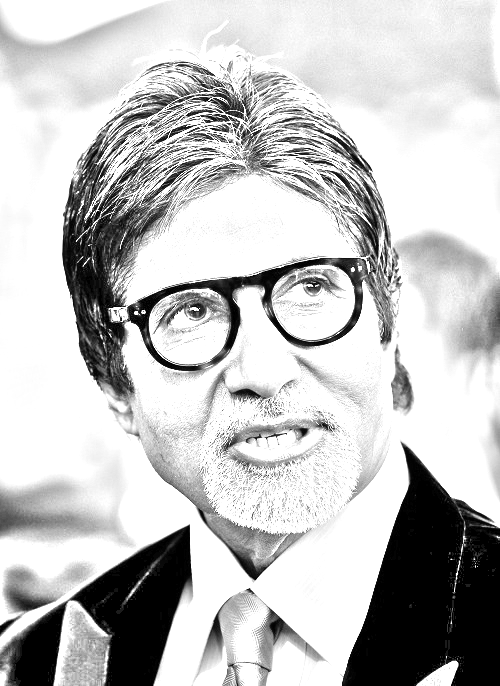

In [63]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageOps, ImageFont
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/sample.jpg")

#converting to pencil sketch
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invert_img=cv2.bitwise_not(grey_img)
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)
invblur_img=cv2.bitwise_not(blur_img)
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

cv2_imshow(sketch_img)

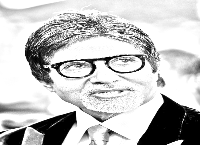

In [64]:
#resizing the res image
width, height = sketch_img.shape
aspect_ratio = height/width
new_width = 200
new_height = int(aspect_ratio * new_width)
sketch_img = cv2.resize(sketch_img, (new_width, new_height))
cv2_imshow(sketch_img)

In [65]:
# making the character list
str = "$@D%8PW*#+,"
ASCII_CHARS = []

for i in str:
  ASCII_CHARS.append(i)

len(ASCII_CHARS)

11

In [66]:
# getting pixel data
pixels = []

for i in range(sketch_img.shape[0]):
  for j in range(sketch_img.shape[1]):
    pixels.append(sketch_img[i][j])


In [ ]:
#converting to ascii art
new_pixels = [ASCII_CHARS[pixel//25] for pixel in pixels]
new_pixels = ''.join(new_pixels)
 
new_pixels_count = len(new_pixels)
ascii_image = [new_pixels[index:index + new_width] for index in range(0, new_pixels_count, new_width)]
ascii_image = "\n".join(ascii_image)
print(ascii_image)
 
# write to a text file.
with open("sample_ascii_image.txt", "w") as f:
 f.write(ascii_image)
